In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.DataFrame({'inputvalue':[100,110,120,130,140,300,150,160,170,180,190,200]})

In [3]:
df

,inputvalue
0,100
1,110
2,120
3,130
4,140
5,300
6,150
7,160
8,170
9,180


In [4]:
df.isnull().sum()

inputvalue    0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
inputvalue,12.0,162.5,53.619026,100.0,127.5,155.0,182.5,300.0


In [6]:
(df.isnull().sum()/df.shape[0])*100

inputvalue    0.0
dtype: float64

In [7]:
df['inputvalue'].mean()

np.float64(162.5)

In [8]:
df['inputvalue'].std()

np.float64(53.61902647381804)

In [9]:
df1=pd.DataFrame({'text':['male','female','male','female','machine learning','male','female','male','female','male','female']})

In [10]:
df1

,text
0,male
1,female
2,male
3,female
4,machine learning
5,male
6,female
7,male
8,female
9,male


In [11]:
df1.value_counts()

text            
female              5
male                5
machine learning    1
Name: count, dtype: int64

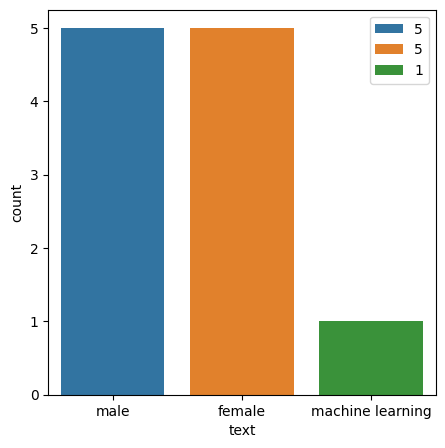

In [12]:
fig,ax=plt.subplots(figsize=(5,5))
sns.countplot(data=df1,x=df1['text'],ax=ax,hue='text')
plt.legend(df1['text'].unique())
plt.legend(df1['text'].value_counts())
plt.show()

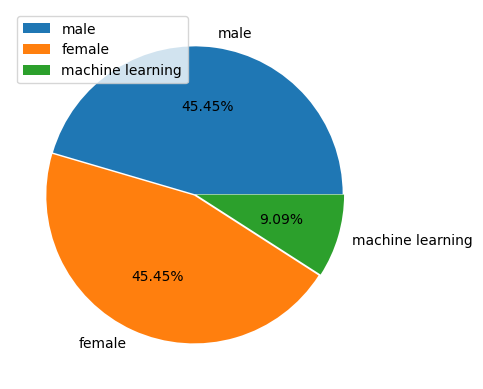

In [13]:
plt.pie(x=df1['text'].value_counts(),labels=df1['text'].unique(),explode=[0,0.01,0.01],autopct='%0.2f%%')
plt.legend()
plt.show()

## Z-Score (Statistical Method) :-

In [14]:
df['z_score']=(df['inputvalue']-df['inputvalue'].mean())/df['inputvalue'].std()
threshold=2
df['z_anomaly']=abs(df['z_score'])>threshold
df['z_anomaly']

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10    False
11    False
Name: z_anomaly, dtype: bool

## IQR (Interquartile Rang) :-

In [15]:
Q1=df['inputvalue'].quantile(0.25)
Q3=df['inputvalue'].quantile(0.75)

IQR=Q3-Q1

lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)

df['iqr_anomaly']=(df['inputvalue']<lower_limit) | (df['inputvalue']>upper_limit)
df[df['iqr_anomaly']==True]

,inputvalue,z_score,z_anomaly,iqr_anomaly
5,300,2.564388,True,True


In [16]:
df1['text_len']=df1['text'].apply(len)
Q1_t=df1['text_len'].quantile(0.25)
Q3_t=df1['text_len'].quantile(0.75)

IQR_t=Q3_t-Q1_t

lo_li_t=Q1_t-(1.5*IQR_t)
up_li_t=Q3_t+(1.5*IQR_t)

out_lier=[(df1['text_len']<lo_li_t) | (df1['text_len']>up_li_t)]
print("Q1 :",Q1_t)
print("Q3 :",Q3_t)
print("IQR :",IQR_t)
print('Outliers :',out_lier)

Q1 : 4.0
Q3 : 6.0
IQR : 2.0
Outliers : [0     False
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8     False
9     False
10    False
Name: text_len, dtype: bool]


## Isolation Forest() :-

In [17]:
from sklearn.ensemble import IsolationForest

islf=IsolationForest(contamination=0.03,random_state=42)
islf.fit(df)
pred=islf.predict(df)
print(pred)

[ 1  1  1  1  1 -1  1  1  1  1  1  1]


In [18]:
from sklearn.ensemble import IsolationForest

is_text=IsolationForest(contamination=0.3,random_state=42)
is_text.fit(df1[['text_len']])
pred_text=is_text.predict(df1[['text_len']])
pred_text

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1])

## One-Class SVM() :-

In [19]:
from sklearn.svm import OneClassSVM

ocs=OneClassSVM(gamma='scale',nu=0.17)
ocs.fit(df)
pred_svm=ocs.predict(df)
print(pred_svm)

[-1 -1  1  1  1 -1  1  1  1  1  1  1]


In [20]:
from sklearn.svm import OneClassSVM

oc_text=OneClassSVM()
oc_text.fit(df1[['text_len']])
pred_te_sv=oc_text.predict(df1[['text_len']])
pred_te_sv

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1])

## DBScan() :-

In [21]:
from sklearn.cluster import DBSCAN

dbs=DBSCAN(eps=3,min_samples=2)
pred_db=dbs.fit_predict(df)

anomaly_dbs=[i for i,label in enumerate(pred_db) if label==-1]
anomaly_dbs

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [22]:
from sklearn.cluster import DBSCAN

db_text=DBSCAN(eps=0.1,min_samples=2)
pre_db_text=db_text.fit_predict(df1[['text_len']])

anom_text=[i for i,label in enumerate(pre_db_text) if label==-1]
anom_text

[4]

# PyOD() :-

In [23]:
from pyod.models.knn import KNN

knn_py=KNN()
knn_py.fit(df)
pred_knn=knn_py.labels_
print(pred_knn)

[0 0 0 0 0 1 0 0 0 0 0 0]


In [24]:
from pyod.models.knn import KNN

knn_text=KNN()
knn_text.fit(df1[['text_len']])
pred_knn_text=knn_text.labels_
pred_knn_text

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])